In [11]:
import pandas as pd
file_path = "DA - Task 2..xlsx"

In [15]:
xls = pd.ExcelFile("DA -Task 2..xlsx")
print(xls.sheet_names)
task2_df = xls.parse(xls.sheet_names[0])
print(task2_df.head())
print(task2_df.columns)

['Sheet1']
                 VIN  TRANSACTION_ID  \
0  3HCFDDE89SH220903           13021   
1  1HRFFEE8XSZ230636           13028   
2  1HYKSMRK6SZ000990           13035   
3  3HCFDFEL3SH241701           13021   
4  1HRFFHEL1RZ181474           13021   

                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0                        STEERING WHEEL COMING APART  2024-01-02   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP  2024-01-03   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...  2024-01-04   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...  2024-01-04   
4  C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...  2024-01-05   

  

In [16]:
print(task2_df.info())
print(task2_df.nunique())
print(task2_df.describe())
print(task2_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [17]:
for col in task2_df.select_dtypes(include=['number']).columns:
    task2_df[col].fillna(task2_df[col].median(), inplace=True)

for col in task2_df.select_dtypes(include=['object']).columns:
    task2_df[col].fillna("Unknown", inplace=True)

print(task2_df.isnull().sum())

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     0
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              0
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              0
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               0
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       0
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

<ipython-input-17-e3339270a2a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  task2_df[col].fillna(task2_df[col].median(), inplace=True)
<ipython-input-17-e3339270a2a9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [18]:
for col in task2_df.select_dtypes(include=['object']).columns:
    task2_df[col] = task2_df[col].str.lower().str.strip()

print(task2_df[col].unique())

[nan 'lux-1' 'premium luxury' 'luxury' 'premier' 'high country' 'sport'
 '2lt' 'tech-2' 'essence' 'lt(automatic)' 'export only' '1lt' 'rs'
 '1ss(automatic)' 'avenir' 'lt' 'preferred' 'at4' 'unknown' 'denali']


In [19]:
critical_columns = [
    "CUSTOMER_VERBATIM",
    "CORRECTION_VERBATIM",
    "CAUSAL_PART_NM",
    "TOTALCOST",
    "REPAIR_AGE"
]
print(task2_df[critical_columns].head())

                                   CUSTOMER_VERBATIM  \
0                        steering wheel coming apart   
1         customer states heated steering wheel inop   
2  owner reports: the super cruise bar on the ste...   
3  customer states the lettering and finish on th...   
4  c/s: customer states the service driver assist...   

                                 CORRECTION_VERBATIM  \
0                   replaced steering wheel now okay   
1  checked - found dtc's u0229 - u1530 set in bcm...   
2  approved 4.9(olh) for added diagnostics with t...   
3                         steering wheel replacement   
4      replaced steering message no longer displayed   

                  CAUSAL_PART_NM  TOTALCOST  REPAIR_AGE  
0      wheel asm-strg *jet black     370.03           6  
1    module asm-strg whl ht cont     307.32           5  
2  wheel asm-strg *backen blackk    3205.45           9  
3      wheel asm-strg *jet black     445.28          10  
4      wheel asm-strg *jet black    

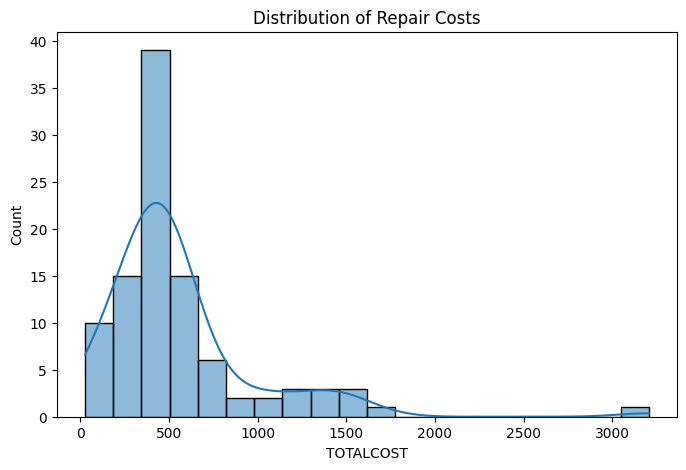

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(task2_df['TOTALCOST'], bins=20, kde=True)
plt.title('Distribution of Repair Costs')
plt.show()

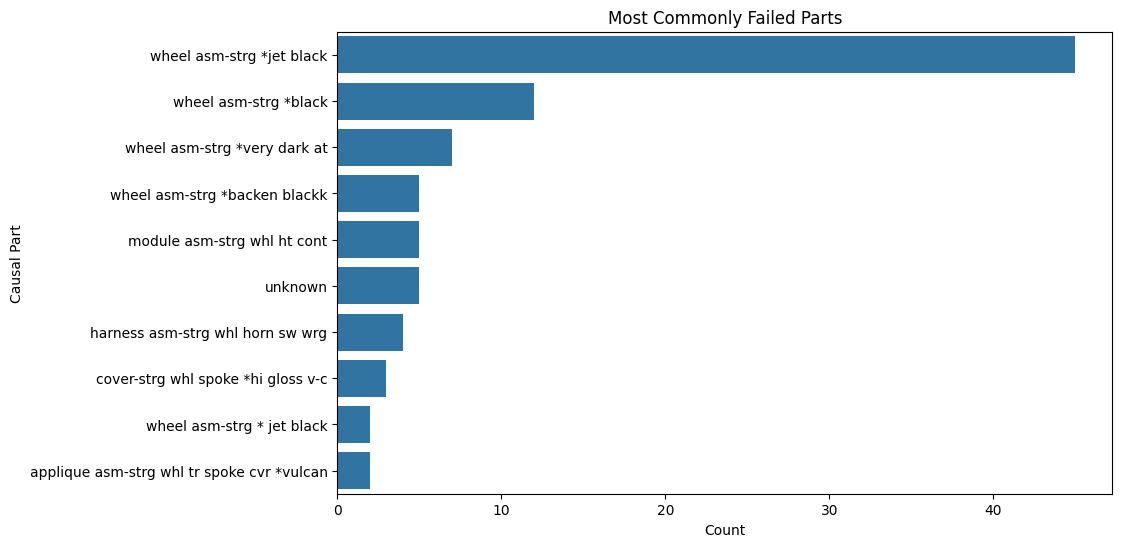

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y=task2_df['CAUSAL_PART_NM'],
              order=task2_df['CAUSAL_PART_NM'].value_counts().index[:10])
plt.title('Most Commonly Failed Parts')
plt.xlabel('Count')
plt.ylabel('Causal Part')
plt.show()

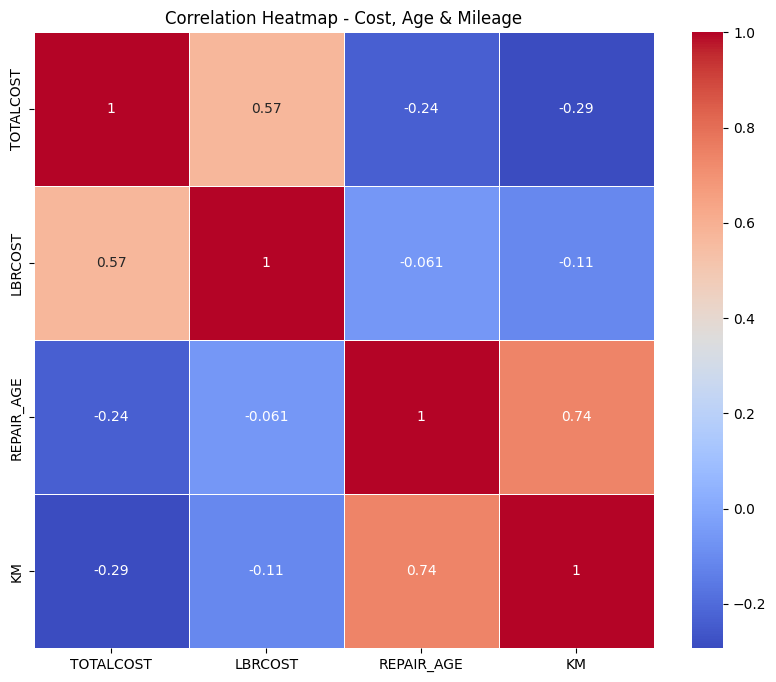

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(task2_df[['TOTALCOST', 'LBRCOST', 'REPAIR_AGE', 'KM']].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap - Cost, Age & Mileage')
plt.show()

In [24]:
from collections import Counter
text_data = " ".join(task2_df['CUSTOMER_VERBATIM'].dropna())
words = text_data.split()
word_counts = Counter(words)
print("Top 20 most common words in complaints:", word_counts.most_common(20))

Top 20 most common words in complaints: [('steering', 100), ('wheel', 97), ('states', 58), ('the', 55), ('customer', 54), ('is', 52), ('on', 42), ('and', 36), ('coming', 25), ('not', 21), ('in', 20), ('heated', 18), ('of', 18), ('sop', 14), ('-', 13), ('check', 11), ('a', 11), ('side', 11), ('apart', 10), ('to', 10)]
